<a href="https://colab.research.google.com/github/moizarsalan/Advanced_Python_Labs/blob/main/Linear_Regression_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression and Binary Classification Model Implementation**
## **Objectives**


*   Implement linear regression and classification models to predict outcomes using a real-world dataset.
*   Explore and preprocess datasets, including handling missing values and outliers.

*   Apply data visualization techniques to understand data distributions and correlations.
*   Train and evaluate a linear regression model using performance metrics.


*   Analyze model performance using metrics such as accuracy, precision, recall, and F1-score.
*   Visualize the importance of features in the model and analyze training loss over time.








# **1. Dataset Exploration and Preprocessing**
Dataset Selection: Choose a real-world dataset suitable for regression and classification tasks (e.g., housing prices for linear regression and customer churn for binary classification).

**Load Data**

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# **Exploring Dataset**

In [ ]:
print(df.describe())

print(df.isnull().sum())

print(df.dtypes)

print(df.corr())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**Explore Dataset:**



# **Data Cleaning:**

*   Handle missing values (e.g., fill with mean/median or drop).
*   Identify and remove outliers (e.g., using Z-score or IQR method).

In [ ]:
import numpy as np

columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero] = df[columns_with_zero].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **2. Data Visualization**
**Distribution of Features:**

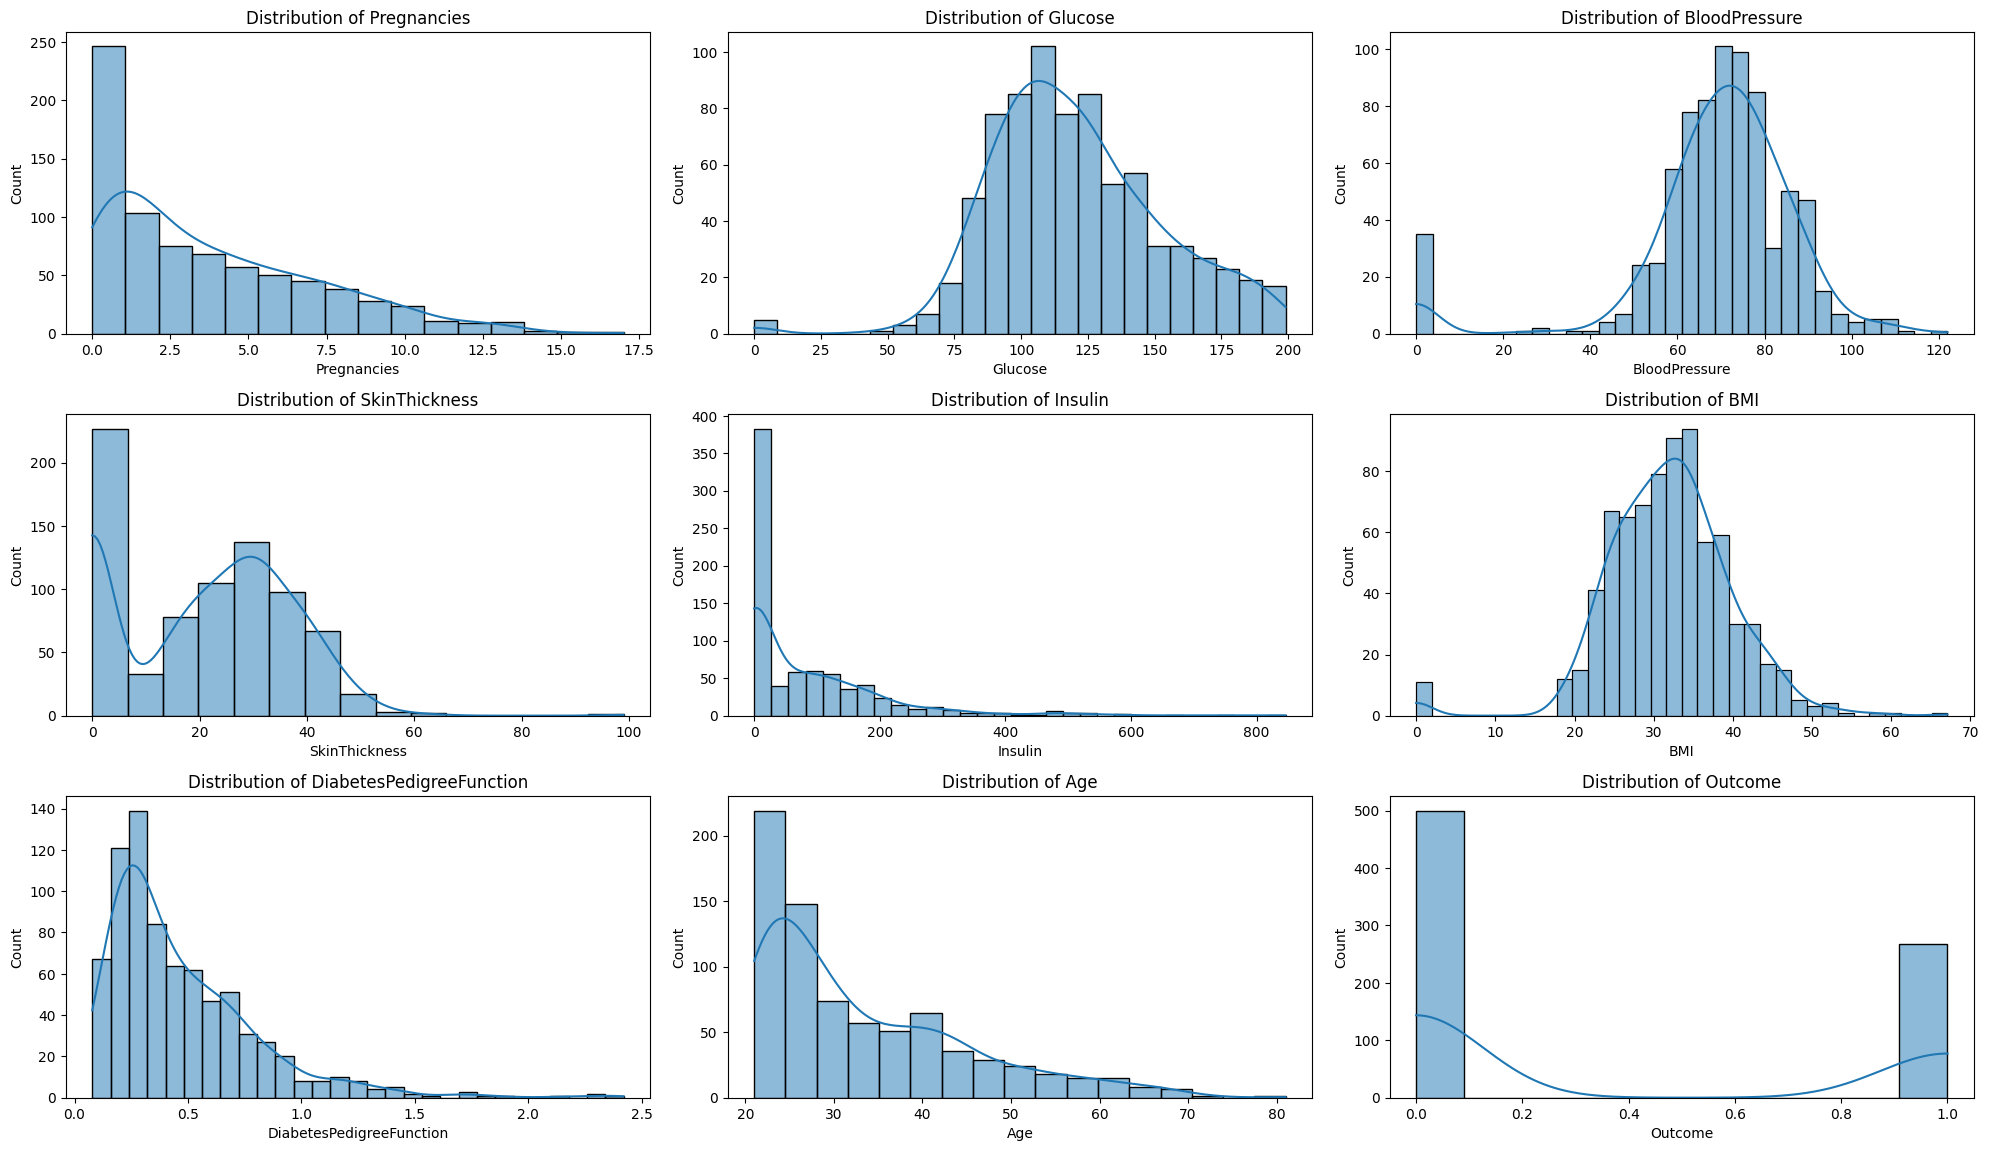

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

features = df.columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**Corelation Matrix**

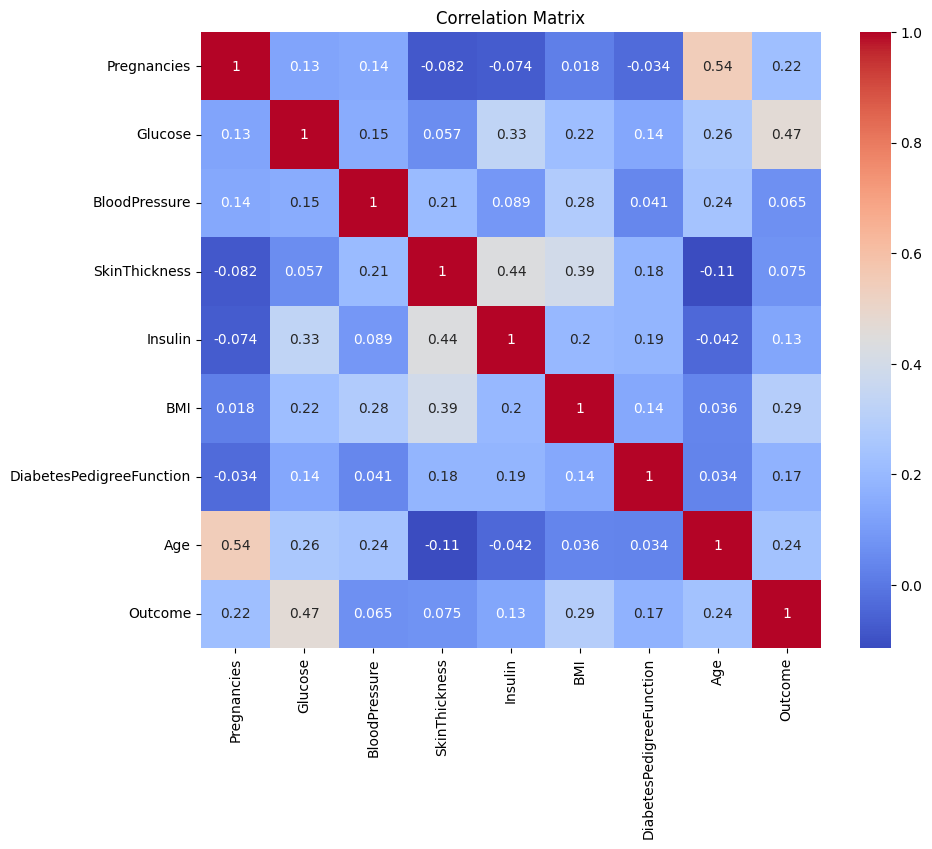

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **3. Model Implementation**
**3.1 Linear Regression**

**Split Data:**

In [ ]:
from sklearn.model_selection import train_test_split

X_lr = df.drop(columns=['Glucose'])
y_lr = df['Glucose']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)


**Train Linear Regression Model:**



In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)


LinearRegression()

# **Make Prediction and Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_lr = lr_model.predict(X_test_lr)

mse = mean_squared_error(y_test_lr, y_pred_lr)
print(f'Mean Squared Error (Linear Regression): {mse}')


Mean Squared Error (Linear Regression): 704.6762254136167


# **Step 6: Classification Model (Logistic Regression)**
**Split the Data**

In [ ]:
X_clf = df.drop(columns=['Outcome'])
y_clf = df['Outcome']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


**Train the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)


LogisticRegression(max_iter=1000)

# **Make Prediction and Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_clf = clf_model.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print(f'Accuracy (Classification): {accuracy}')
print(f'Precision (Classification): {precision}')
print(f'Recall (Classification): {recall}')
print(f'F1-Score (Classification): {f1}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy (Classification): 0.7467532467532467
Precision (Classification): 0.6379310344827587
Recall (Classification): 0.6727272727272727
F1-Score (Classification): 0.6548672566371682
Confusion Matrix:
[[78 21]
 [18 37]]


## **Feature Importance Visualization**

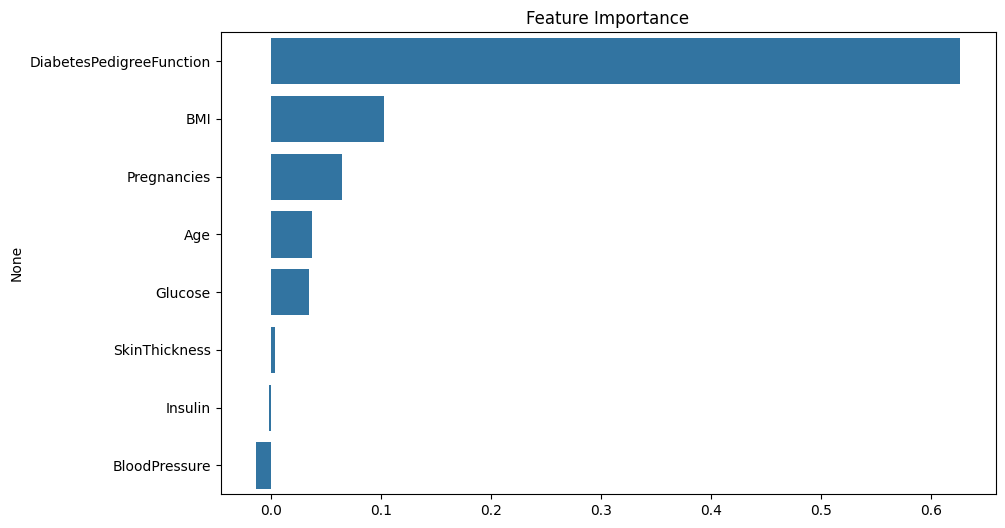

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv')

X_clf = df.drop(columns=['Outcome'])
y_clf = df['Outcome']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)

feature_importance = pd.Series(clf_model.coef_[0], index=X_clf.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


**Training Loss Visualization (if available)**

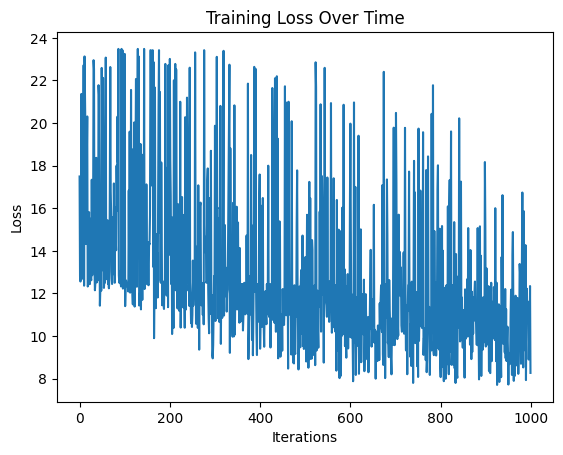

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

df = pd.read_csv('diabetes.csv')
X_clf = df.drop(columns=['Outcome'])
y_clf = df['Outcome']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

loss_values = []
for i in range(1, 1001):
    clf_model.partial_fit(X_train_clf, y_train_clf, classes=np.unique(y_clf))
    y_pred_prob = clf_model.predict_proba(X_train_clf)
    loss = log_loss(y_train_clf, y_pred_prob)
    loss_values.append(loss)

plt.plot(loss_values)
plt.title('Training Loss Over Time')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
